In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
from numpy import sin, cos, e, pi, log
from IPython.display import display, Math
import warnings
from scipy.optimize import OptimizeWarning

#These two warning kept being printed so I just ignored them to make it look cleaner
warnings.filterwarnings('ignore', category=OptimizeWarning) 
warnings.filterwarnings('ignore', category=DeprecationWarning)  

A. (5 pts) Read in the data in co2_ mm_mlo.csv using numpy’s np.loadtxt(...) (skip two rows) or a
pandas dataframe df = pd.read_csv(...) (skip 1 row). If the former, store the incoming data as
an array and then slice the array to reference the data columns you will use when making your plots.
If using a pandas dataframe, convert the relevant data columns to numpy arrays using, for example,
df['decimal date'].to_numpy(). Use the third data column for the time, the fourth data
column for the CO2 concentration, and the last column for the uncertainties in column 4 data.


In [10]:
data = np.loadtxt('co2_mm_mlo.txt', skiprows = 2)
month = data[:, 1] #Months are the second column
time = data[:,2] #Time is the third column
concentration = data[:, 3]
uncertaintiesInConcentration = data[:, -1]
deseasonalize = data[:, 4]

In [11]:
base_12 = 0 #I create base 12 counting so that I can count the months in case I need this, I don't think I did
for i, c in enumerate(month):
    if c == 1:
        base_12+=1
    month[i]+=base_12*12
    

B. (5 pts) You will notice that though the data record begins in March 1958, the uncertainties in the
data, shown in the last column, are not known until May 1974, and are listed simply as -0.99. Read
through and replace (using code) all negative and zero values in this last column with the mean of all
the positive entries in this column, else you will have trouble with the curve-fitting.

In [31]:
mean = 0
count = 0
for i in uncertaintiesInConcentration:
    if i>0:
        mean+=i #This is taking the mean of all nonnegative, nonzero uncertainties
        count+=1
mean /= count

for i, c in enumerate(uncertaintiesInConcentration):
    if c<=0:
        uncertaintiesInConcentration[i] = mean #This goes through each index in uncertainties and if it is less than or equal to zero it replaces the value at that index with the mean

C. (5 pts) Plot the data for CO2 concentration vs time. To better see the trend, plot without symbols.
Describe what you see. Next, plot a limited range (say a decade) of the data with symbols including
error bars (last column) so you can see how the size of the error bars compare with the seasonal
oscillation. Be sure to put in axis labels, with units, and a title. Do this for a decade post 1974.

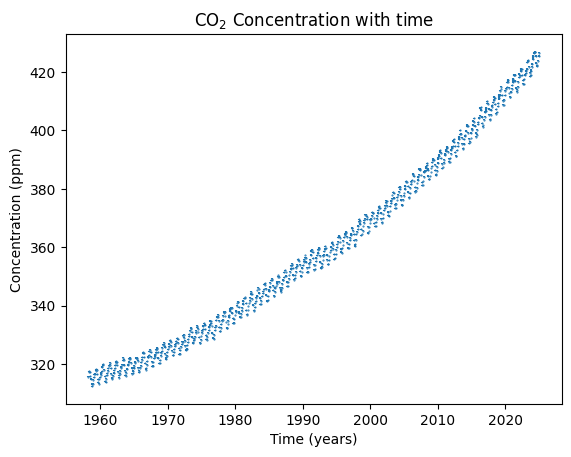

In [13]:
plt.figure()
plt.errorbar(time, concentration, yerr = uncertaintiesInConcentration, fmt ='o', markersize= 0.5) #Plotting the concentration as points
plt.xlabel("Time (years)")
plt.ylabel("Concentration (ppm)")
plt.title(r"CO$_2$ Concentration with time")
plt.show()

[344.21 344.92 345.68 347.38 347.77 347.16 345.79 343.74 341.59 341.86
 343.31 345.   345.48 346.42 347.91 348.66 349.28 348.65 346.9  345.26
 343.47 343.35 344.73 346.12 346.78 347.48 348.25 349.86 350.52 349.98
 348.25 346.17 345.48 344.82 346.22 347.48 348.73 348.92 349.81 351.4
 352.15 351.58 350.21 348.2  346.66 346.72 348.08 349.28 350.51 351.7
 352.5  353.67 354.35 353.88 352.8  350.49 348.97 349.37 350.42 351.62
 353.07 353.43 354.08 355.72 355.95 355.44 354.05 351.84 350.09 350.33
 351.55 352.91 353.86 355.1  355.75 356.38 357.38 356.39 354.89 353.06
 351.38 351.69 353.14 354.41 354.93 355.82 357.33 358.77 359.23 358.23
 356.3  353.97 352.34 352.43 353.89 355.21 356.34 357.21 357.97 359.22
 359.71 359.44 357.15 354.99 353.01 353.41 354.42 355.68 357.1  357.42
 358.59 359.39 360.3  359.64 357.45 355.76 354.14 354.23 355.53 357.03
 358.36 359.04 360.11 361.36 361.78 360.94 359.51 357.59 355.86 356.21
 357.65 359.1 ]


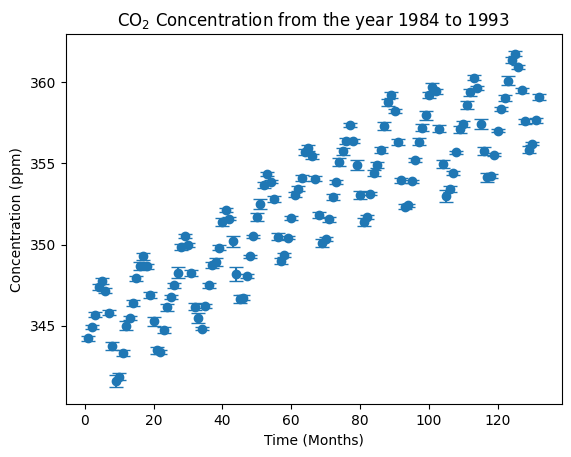

In [14]:
plt.figure()
print(concentration[310:442]) # this was done to determine that [10:22] starts at the start of a year and ends at the end of a year
# the set [1,2,3,4,5,6,7,8,9,10,11,12] is to change the x axis to 1 of the 12 months, this is for cleanness.
tempYears = np.arange(1, 133)
plt.errorbar(tempYears, concentration[310:442], uncertaintiesInConcentration[310:442], fmt = 'o', capsize = 5) # Plotting 1984 to 1993  so we have 10 full years plotted. 
plt.xlabel("Time (Months)")
plt.ylabel("Concentration (ppm)")
plt.title(r"CO$_2$ Concentration from the year 1984 to 1993")
plt.show()


D. (5 pts) You should notice that the data have a pronounced oscillation of about 1 year due to seasonal
variations in CO2 levels. This is superimposed on a clearly visible trend in the data. Plot data over a
two-year period and estimate the magnitude of the oscillation. What is the source of this oscillation?
(You may have to do a little research for this.) How does the oscillation magnitude compare with the
size of the uncertainties in the data (column 8) – i.e. can you say definitively that the oscillation is a
feature? Answer in a markdown cell.

The oscillation is "driven by Northern Hemisphere summer vegetation growth"

-2.928794248975418


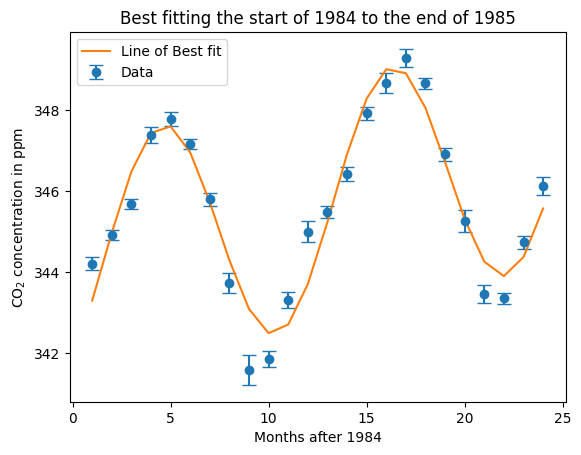

In [15]:
x = np.arange(1, 25)
xVal = np.copy(x)
y=concentration[310:334]
a, b = np.polyfit(x, y, 1)  # Linear regression fit

# 2. Estimate Oscillation Parameters
A = (np.max(y) - np.min(y)) / 2  # Amplitude estimate
num_oscillations = 3  # Approximate number of cycles
C = (2 * np.pi / (len(y) / num_oscillations))  # Frequency estimate
D = 0  # Initial phase shift (can be adjusted)

plt.figure()


plt.errorbar(xVal, concentration[310:334], yerr = uncertaintiesInConcentration[310:334], fmt = 'o', capsize = 5, label = 'Data') #Plotting the data I am going to fit

def curve(X, amplitude, frequency, phase, shift, a): #Defining a best fit function that takes the form of A*sin(ωx + φ) +ax + b
    return amplitude*np.sin(frequency * X + phase) + shift + a*X

popt, pcov = curve_fit(curve, xVal, concentration[310:334], sigma = uncertaintiesInConcentration[310:334], p0 = [A, C/3, D, b, a]) #I divide by 3 in the frequency because I was having issues with my guess. 
yFit = curve(xVal, *popt)
plt.plot(xVal, yFit, label = 'Line of Best fit')
plt.xlabel("Months after 1984")
plt.ylabel(r"CO$_2$ concentration in ppm")
plt.title("Best fitting the start of 1984 to the end of 1985")
plt.legend()
print(popt[0]) #This prints out the amplitude



The amplitude is roughly 3, as shown in my curve of best fit. The amplitude of the oscillation is significantly larger than the error. Even in the extreme cases of error the oscillation would still have roughly a magnitude of 3.

E. (5 points) Smooth out the annual variation by making yearly averages of the data. To make things
simple, ignore the years that do not have 12 months of data (1958 and 2025). For the remaining
years, calculate the average over twelve months. This should give you a data set with annual average
CO2 levels. Plot this on top of the original data. Does this make the trend in the data clearer?
Compare this plotted average to a plot of the data in column 5, which are “deseasonalized” values.

In [16]:
yearlyAverages = []
tempAv = 0
count = 0
for i, c in enumerate(time):
    if 1959 <= c < 2025: #All values of time that are after the year 1959 and before 2025
        tempAv += concentration[i]/12
        count+=1
        if count ==12: #On the year I reset my counter and append my averages to yearlyAverages
            yearlyAverages.append(float(tempAv))
            tempAv = 0
            count = 0
yearlyAverages = np.array(yearlyAverages) #Converting to a numpy array

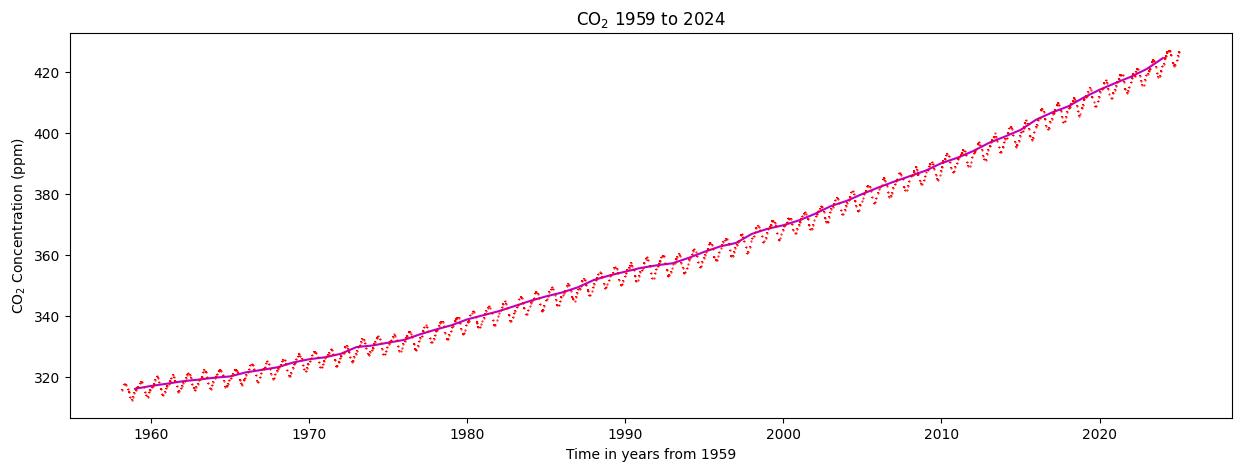

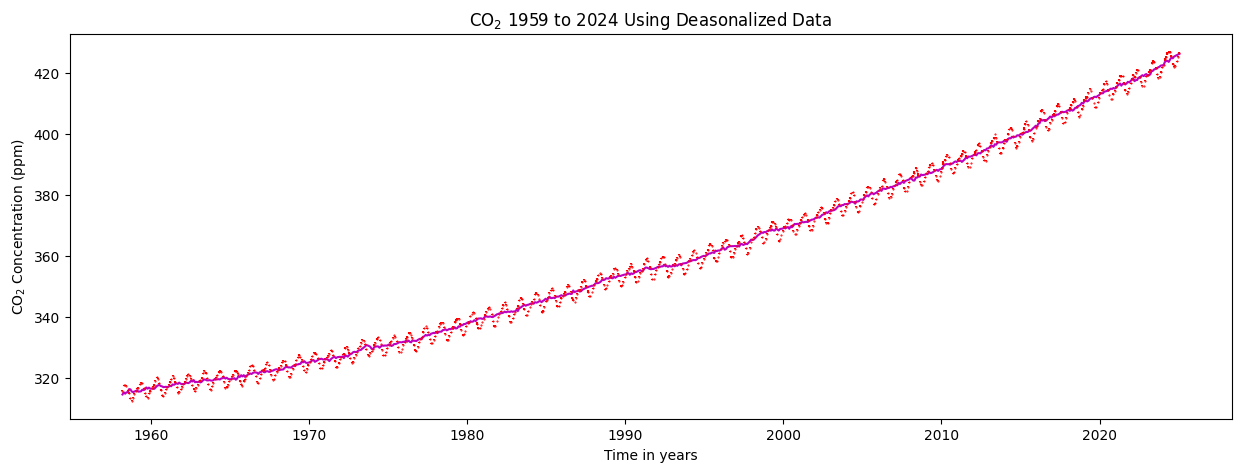

In [17]:
import matplotlib.pyplot as plt
import numpy as np

#plotting the yearly averages data
plt.figure(figsize = (15,5))
plt.title(r"CO$_2$ 1959 to 2024")
plt.ylabel(r"CO$_2$ Concentration (ppm)")
plt.xlabel("Time in years from 1959")
plt.errorbar(time, concentration, yerr = uncertaintiesInConcentration, fmt ='o', markersize= 0.5, color = 'r', label = 'data')
plt.plot(np.arange(1959, 2025), yearlyAverages, color = 'm', label = 'Yearly Averages')
plt.show()

#Plotting the deseasonalized data
plt.figure(figsize = (15, 5))
plt.title(r"CO$_2$ 1959 to 2024 Using Deasonalized Data")
plt.ylabel(r"CO$_2$ Concentration (ppm)")
plt.xlabel("Time in years")
plt.errorbar(time, concentration, yerr = uncertaintiesInConcentration, fmt ='o', markersize= 0.5, color = 'r', label = 'data')
plt.plot(time, deseasonalize, color = 'm', label = "Deasonalized data")
plt.show()

The two look very similar. The trend is more clearly an exponential curve when we plot the averages. 

II.


A. (10 pts) Define a linear polynomial function, then perform a linear fit to the data, and find the best
values of the intercept and slope. Use the data uncertainties in your fit (using the keyword sigma in
curve_fit()).
a. Plot the data and the best fit line together.
b. Print the best fit parameter values +/- $\sigma$ (uncertainties) and reduced chi-squared value to the
screen. (Include units).
c. Make a separate plot of the residuals (the difference between the fit and the data). You can do
this as a smaller subplot. What information do we get from residuals? Discuss.

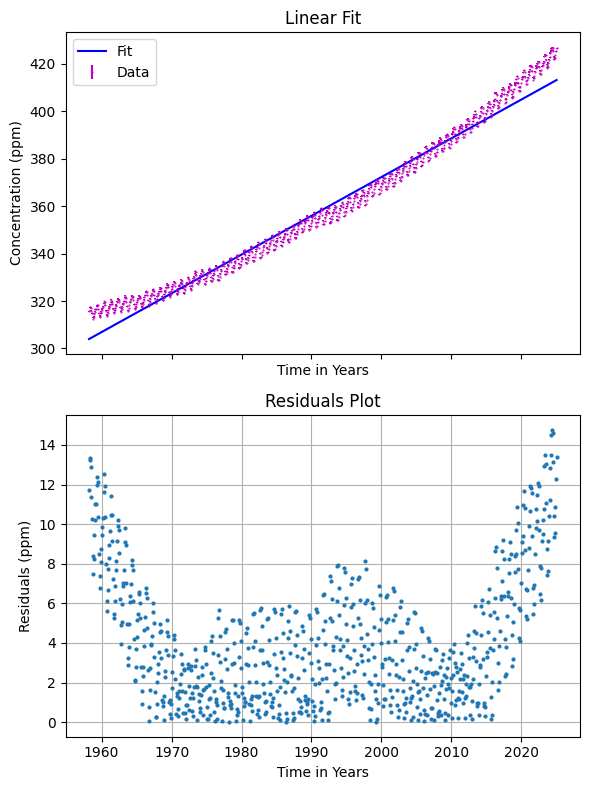

The parameters of the linear fit are as follows. The y-intercept is -2897.0466241573504 ± 18.44471754791167.
The slope is 1.634674889121534 ± 0.009254646005458477.
Reduced Chi-Square: 827.8567


In [18]:
def poly(X, *params):
    return np.sum(c*X**i for i, c in enumerate(params))

# Fit the data
linearGuess = [1, 1]
linPopt, linPcov = curve_fit(poly, time, concentration, sigma=uncertaintiesInConcentration, p0=linearGuess)
linPerr = np.sqrt(np.diag(linPcov))

# Create figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

# First subplot: Data and fit
axes[0].errorbar(time, concentration, yerr=uncertaintiesInConcentration, fmt='mo', markersize=0.5, label="Data")
xFit = np.copy(time)
yFit = poly(xFit, *linPopt)
axes[0].plot(xFit, yFit, label="Fit", color='b')
axes[0].set_ylabel("Concentration (ppm)")
axes[0].set_xlabel("Time in Years") #I do not know why but the x ticks are the same as the graph previous, but would not show. 
axes[0].legend()
axes[0].set_title("Linear Fit")

# Calculate residuals
residY = poly(time, *linPopt)
residuals = residY - concentration
dof = len(time) - len(linPopt) 
linChi2 = np.sum((residuals**2)/(uncertaintiesInConcentration**2))
linRedChi2 = linChi2 / dof

# Second subplot: Residuals
axes[1].plot(time, np.abs(residuals), marker='o', linestyle='none', markersize=2)
axes[1].grid(True)
axes[1].set_xlabel("Time in Years") 
axes[1].set_ylabel("Residuals (ppm)")
axes[1].set_title("Residuals Plot")

# Adjust layout and show
plt.tight_layout()
plt.show()

# Print results
print(f"The parameters of the linear fit are as follows. The y-intercept is {linPopt[0]} ± {linPerr[0]}.")
print(f"The slope is {linPopt[1]} ± {linPerr[1]}.")
print(f"Reduced Chi-Square: {linRedChi2:.4f}")


The residuals plot tells us that while the residuals are low around the middle, the distance from our fit to the actual values increases at roughly a linear rate, this would lead us to believe that the curve takes on the form of a quadratic. 

B. (10 pts) Next, investigate whether you can find a better fit to the data. Define a quadratic fit function
and use it to fit to the data, and extract the best values of the fit parameters.
a. Plot the data and the best fit line together.
b. Print the best fit parameter values +/- $\sigma$ (uncertainties) and reduced chi-squared value to the
screen. (Include units).
c. Make a plot of the residuals. Once again, this can be done as a smaller subplot.

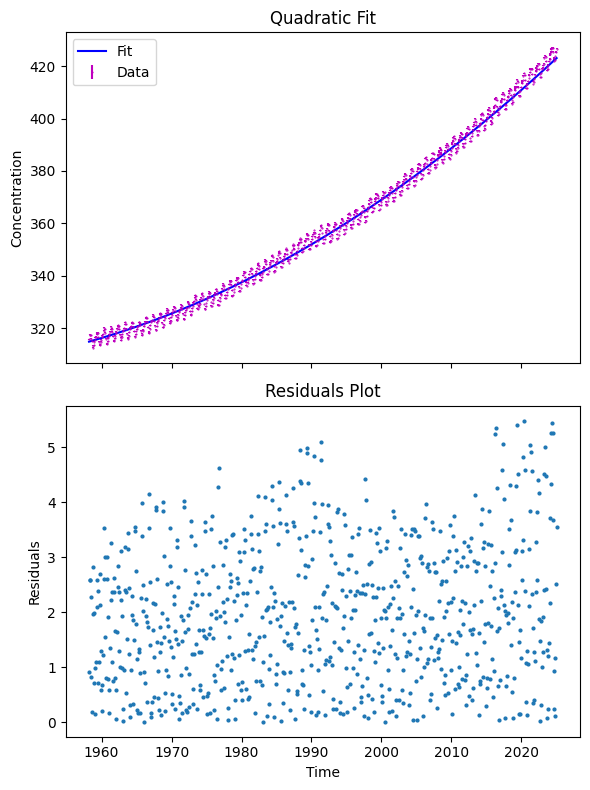

The parameters of the quadratic fit are as follows. The y-intercept is 48333.14154791733 ± 1026.2210105268289.
The bx parameter is -49.800837597002385 ± 1.0303036284126355.
The coefficient for the squared term is 0.01290938636067725 ± 0.0002585851053381968.
Reduced Chi-Square: 5.4168


In [19]:
def poly(X, *params):
    return np.sum(c*X**i for i, c in enumerate(params))

# Fit the data
quadGuess = [1, 1, 1]
quadPopt, quadPcov = curve_fit(poly, time, concentration, sigma=uncertaintiesInConcentration, p0=quadGuess)
quadPerr = np.sqrt(np.diag(quadPcov))

# Create figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

# First subplot: Data and fit
axes[0].errorbar(time, concentration, yerr=uncertaintiesInConcentration, fmt='mo', markersize=0.5, label="Data")
xFit = np.linspace(min(time), max(time), len(time))
yFit = poly(xFit, *quadPopt)
axes[0].plot(xFit, yFit, label="Fit", color='b')
axes[0].set_ylabel("Concentration")
axes[0].legend()
axes[0].set_title("Quadratic Fit")

# Calculate residuals
residY = poly(time, *quadPopt)
residuals = residY - concentration
dof = len(time) - len(quadPopt)
quadChi2 = np.sum(residuals**2)
quadRedChi2 = quadChi2 / dof

# Second subplot: Residuals
axes[1].plot(time, np.abs(residuals), marker='o', linestyle='none', markersize=2)
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residuals Plot")

# Adjust layout and show
plt.tight_layout()
plt.show()

# Print results
print(f"The parameters of the quadratic fit are as follows. The y-intercept is {quadPopt[0]} ± {quadPerr[0]}.")
print(f"The bx parameter is {quadPopt[1]} ± {quadPerr[1]}.")
print(f"The coefficient for the squared term is {quadPopt[2]} ± {quadPerr[2]}.")
print(f"Reduced Chi-Square: {quadRedChi2:.4f}")

The reduced chi square is significantly smaller, and the residuals are less consistently off, this leads us to believe that the quadratic fit is a much better fit for this set of data. 

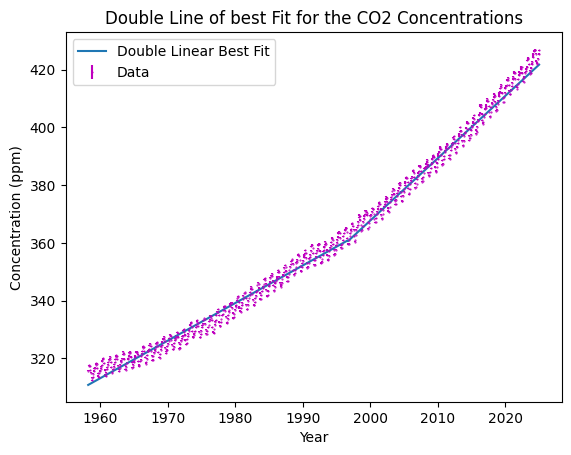

The reduced chi square is: 7.072356520302143


In [20]:
#Double Linear Guess

#Defining a function that can be optimized for two seperate lines
def doubleLin(X, slope1, intercept1, slope2, intercept2, splitVal):
    splitVal = int(splitVal)  # Ensure it's treated as an index and not a value
    
    # Seperating the lines at the split value
    line1 = (X[:splitVal]) * slope1 + intercept1
    line2 = X[splitVal:] * slope2 + intercept2

    return np.concatenate((line1, line2))  #concatenate puts these two together


# Initial parameter guess: [slope1, intercept1, slope2, intercept2, splitVal]

tempSplit = 0
#This calculates the reduced chi squared for my double lines, it uses the same process as the previous chi squared methods. The only difference is it takes an input, splitVal.
#This value is used in a for loop to figure out the optimal place to split to reduce chi squared, curve_fit does not seem able to do this
def doubleRedChi2(splitVal):
    dLinPopt, dLinPcov = curve_fit(doubleLin, time, concentration, sigma=uncertaintiesInConcentration, p0=[1,1,1,1,splitVal])
    x = np.linspace(min(time), max(time), len(time))
    residY = doubleLin(x, *dLinPopt)
    residuals = residY - concentration #my Pcov doesn't work I dont know why but thats why its not included in residuals for redchi2
    dof = len(time) - len(dLinPopt)
    Chi2 = np.sum(residuals*residuals)
    redChi2 = Chi2/dof
    return redChi2, splitVal

#This assigns the temporary reduced chi squared to a variable, and I ignore the split value. I chose the first index because that will be the first index in loop so nothing is messed up by me doing this.
tempRedChi2, ignoreTerm = doubleRedChi2(1)
for i, c in enumerate(time): #I use enumerate because range(time) does not work
    redChi, holdSplit = doubleRedChi2(i)
    #if the reduced chisquare is smaller than we store that and store the location at this point
    if redChi<=tempRedChi2:
        tempRedChi2=redChi
        tempSplit = holdSplit

#This creates a guess of all ones but uses the optimized splitValue
linGuess = [1,1,1,1,tempSplit]

# Curve fitting
dLinPopt, dLinPcov = curve_fit(doubleLin, time, concentration, sigma=uncertaintiesInConcentration, p0=linGuess)

#Plotting
plt.figure()
plt.errorbar(time, concentration, yerr=uncertaintiesInConcentration, fmt='mo', markersize=0.5, label="Data") #Data
xFit = np.linspace(min(time), max(time), len(time))
yFit = doubleLin(xFit, *dLinPopt)
plt.plot(xFit, yFit, label = 'Double Linear Best Fit')
plt.legend()
plt.ylabel("Concentration (ppm)")
plt.xlabel("Year")
plt.title("Double Line of best Fit for the CO2 Concentrations")
plt.show()
print(f"The reduced chi square is: {tempRedChi2}")

C. (5 pts) Assess your fits in two ways. First, compare the reduced chi-squared for each fit. How well is
the data described by a linear function? A quadratic function? Put your observations in a markdown
cell.

The reduced chi squared for an optimized singular line (linear), is 827. It is also observed that a lot of points are far off from this point, it would then seem as though this does not work well for this set of data.
The reduced chi squared for an optimized singular curve (quadratic), is 5.4. It is observed that this fit passes through the middle of the mass of points. This seems that it would serve as a fine fit for the data.
The reduced chi squared for an optimized double line (linear), is 7.1. This seems to work as well as the quadratic when looking at it, but the difference between the quadratic and the double linear's reduced chi squares makes the quadratic seem to be a better fit.

D. (5 points) Next, compare the residuals from the linear fit to the residuals from the quadratic fit. What
do you observe, and what does this tell you about the quality of the two fits? Pick the residuals of the
better fit of the two you tried. This should give you the seasonal variations without the overall
increasing trend in CO2 levels. Are the seasonal oscillations consistent in time or do you see any
patterns? Put your observations in a markdown cell.

The residuals from the linear fit are much higher than those of the quadratic fit and the data seems more greatly dispersed. The quadratic fit has residuals which are consistently everywhere, but appears to uptick slightly toward the end of the time we observed. The double line fit seems to be worse than the quadratic fit, this can be observed from the visual and the reduced chi squared. The oscillations seem relatively consistent in time, thats why the general height of the quadratic fits residuals had roughly the same height each time. 

III

A. (10 pts) Read in the data file using a pandas dataframe df = pd.read_csv(...) (skip 1 row). Look
at the headings on the data columns – the first lists the year starting in 1880 and ending in 2025, and
the next 12 columns are temperature anomalies recorded in each month of the year. The subsequent
columns are averages – the first ('J-D') is an annual average, the next few represent averages over
particular months. Store the first column (‘Year’) as a numpy array using df['Year'].to_numpy(),
and store columns 'J-D', 'Jan' and 'MAM' in separate numpy arrays. You will notice that some of
the data is missing and stored as ‘***’. This will give you an error when you try to plot your data, so
find a solution to dealing with these, and explain what you have done.

In [21]:
df = pd.read_csv("GLB.Ts+dSST.csv", skiprows = 1)
df.replace('***', np.nan, inplace = True) #I search for all values of that form '***' and then replace them with np.nan, this is because this is a placeholder number used when there is an unknown value

Months = df.iloc[:, 1:13].astype(float) #Selecting the first 12 columns after skipping the first column

Year = df['Year'].to_numpy()
JD =  pd.to_numeric(df['J-D']).to_numpy()
Jan =  pd.to_numeric(df['Jan']).to_numpy()
MAM =  pd.to_numeric(df['MAM']).to_numpy()

B. (5 pts) Plot 'J-D', 'Jan' and 'MAM' vs 'Year' on the same graph. Add legends so we know which
curve is what. Describe what you observe in the data in a markdown cell.


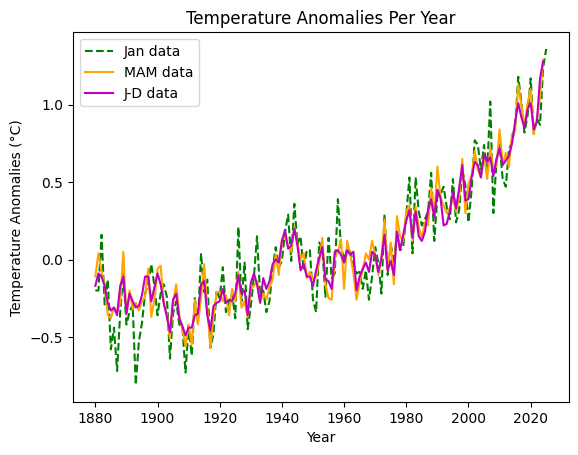

In [22]:
plt.figure()
plt.plot(Year, Jan, markersize = 0.5, color = 'g', linestyle = '--', label = 'Jan data')
plt.plot(Year, MAM, markersize = 0.5, color ='orange', label = 'MAM data')
plt.plot(Year, JD, markersize = 0.5, color = 'm', label = 'J-D data')
plt.legend()
plt.ylabel("Temperature Anomalies (°C)")
plt.xlabel("Year")
plt.title("Temperature Anomalies Per Year")
plt.show()

We observed that the data all takes the same shape, just the january data has a large oscillation. The MAM and J-D data seem relatively consistent with one another.

C. (10 pts) Now focus on making sense of trends in the annual average 'J-D' vs 'Year'. Define a
function that you think will fit the data, justify your choice, and carry out the fit. Does it make sense
to fit the entire range of data with one function? You may choose to divide the data into 2 halves and
fit each half separately. Justify your approach and your analysis.

I see two divets and then a primarily upward going curve. Because of this I will try using two quadratic equations in a manner that is similar to how I did the two linear equations.

In [23]:
# Double quadratic function
def doubleQuad(X, a1, b1, c1, a2, b2, c2, splitVal):
    splitVal = int(splitVal)
    X1 = X[:splitVal]
    X2 = X[splitVal:]
    quad1 = a1*X1*X1 + b1*X1 + c1
    quad2 = a2*X2*X2 + b2*X2 + c2
    
    return np.concatenate((quad1, quad2)) #This joins the two fits into one line

In [24]:
#This finds the reduced chi squared for a set split value because the split value stays the same as in the guess when using curve_fit, everything about calculating residuals is typical
def doubleQuadRedChi2(data, splitVal):
    splitVal = int(splitVal)
    Year1 = Year[0:len(data)]
    dQuadPopt, dQuadPcov = curve_fit(doubleQuad, Year1, data, p0=[1,1,1,1,1,1, splitVal])
    x = np.linspace(min(Year1), max(Year1), len(Year1))
    residY = doubleQuad(x, *dQuadPopt)
    residuals = residY - data
    dof = len(Year)-len(dQuadPopt)
    Chi2 = np.sum(residuals*residuals)
    redChi2 = Chi2/dof
    return redChi2



def findOptimalSplit(data):
    # Remove columns with NaN values
    data1 = data[~np.isnan(data)]
    Year1 = Year[0:len(data1)]
    tempChi2 = doubleQuadRedChi2(data1, 0)
    tempPosition = 0
    for i, c in enumerate(Year1): #going through each index of Year and looking at its value, primarily used just for the index.
        holderVal = doubleQuadRedChi2(data1, i) #This is the temporary reduced Chi squared and is stored for comparison purposes. 
        if tempChi2>holderVal:
            tempChi2 = holderVal
            tempPosition = i
    return tempPosition


#This is just plotting made simpler by creating a function. I have the same x axis issue where since they all match only the bottom one shows
def plot3c(fig, data, data_name):
    data1 = data[~np.isnan(data)]
    Year1 = Year[0:len(data1)]
    fig.scatter(Year, data, s = 5, label = data_name)
    splitVal = findOptimalSplit(data)
    dQuadPopt, dQuadPcov = curve_fit(doubleQuad, Year1, data1, p0=[1,1,1,1,1,1, splitVal])
    xFit = np.copy(Year)
    yFit = doubleQuad(xFit, *dQuadPopt)
    fig.plot(xFit, yFit, color = 'm', label = 'Double Quadratic Line of Best fit')
    fig.legend()
    fig.set_xticks([1880, 1900, 1920, 1940, 1960, 1980, 2000, 2020])
    fig.set_xlabel('Years')
    fig.set_ylabel('Temperature Anomaly (°C)')
    fig.set_title(f"The Temperature Anomaly of {data_name} over Time")
    print(doubleQuadRedChi2(data1, splitVal))

0.009447563499532564
0.034442362881810316
0.015962323050526018


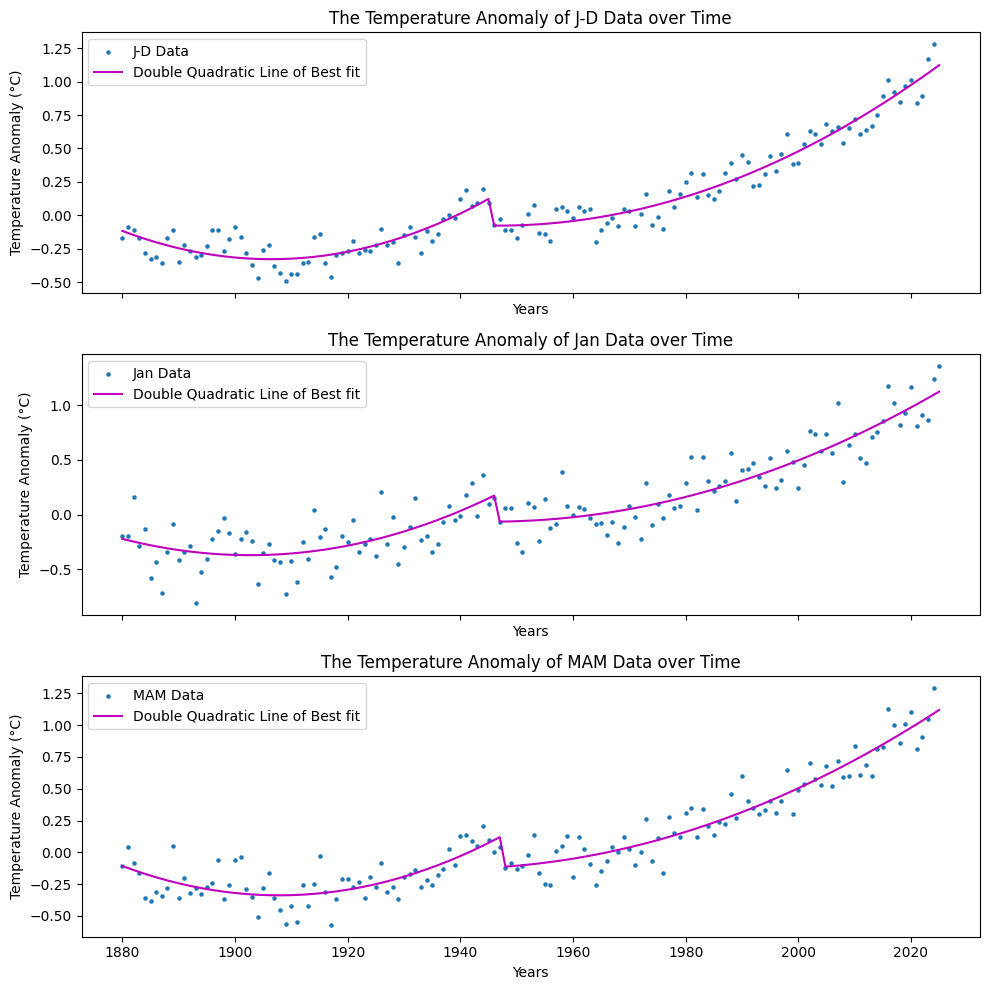

In [25]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
plot3c(axes[0], JD, 'J-D Data')
plot3c(axes[1], Jan, 'Jan Data')
plot3c(axes[2], MAM, 'MAM Data')
plt.tight_layout()
plt.show()

The reduced Chi Squared for each plot is printed above the subplots. These are all really low values. This means that these are net pretty good fits for the data. 

D. (10 points) Graph the annual average vs year, and on the same graph, show the minimum and the
maximum recorded temperature in any given year as error bars (ask me for help on this if interested).
Discuss how recent trends in the global average temperature anomaly compares with these annual
fluctuations.


In [26]:
JDCleared = JD[~np.isnan(JD)]
JanCleared = Jan[~np.isnan(Jan)]

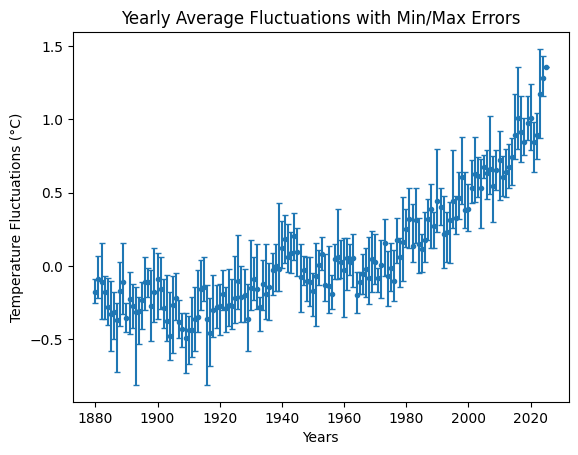

In [27]:
yearlyMax = Months.max(axis=1) #This takes the maximum values along each row, in the horizontal direction
yearlyMin = Months.min(axis=1) #This takes the minimum values along each row, in the horizontal direction
yearlyAverage = Months.mean(axis=1)

plt.figure()
plt.errorbar(Year, yearlyAverage, yerr=[yearlyAverage - yearlyMin, yearlyMax - yearlyAverage], fmt='o', capsize=2, markersize=3)
plt.title("Yearly Average Fluctuations with Min/Max Errors")
plt.xlabel("Years")
plt.ylabel("Temperature Fluctuations (°C)")
plt.show()



IV

A. (5 pts) Use your linear and quadratic fits to project the CO2 levels at Mauna Loa in 2058, 100
years since the beginning of the data set. Generate a plot with the data and your two fits (one
linear, one quadratic) with the time axis extended to 100 years, find the predicted value of the
CO2 concentration at t=100 years in both fits, and print these to the screen, with units.

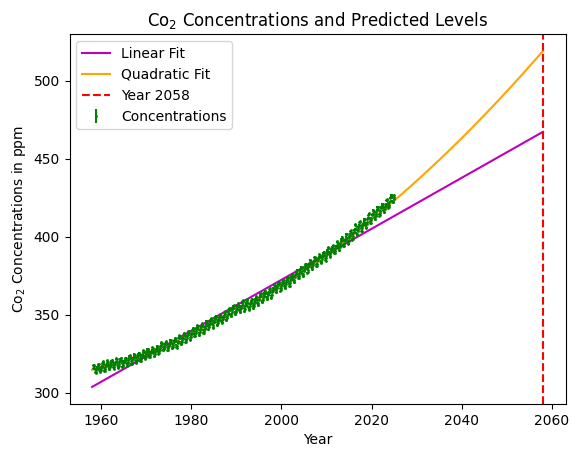

Predicted CO₂ in 2058 (Linear): 467.11429765476623 (ppm)
Predicted CO₂ in 2058 (Quadratic): 518.9680273898703 (ppm)


In [28]:
#Parameters are linPopt, and quadPopt, func = poly

MaunaLoa = np.linspace(1958, 2058, 1000)
linMaunaLoa = poly(MaunaLoa, *linPopt)
quadMaunaLoa = poly(MaunaLoa, *quadPopt)
plt.figure()
plt.plot(MaunaLoa, linMaunaLoa, color = 'm', label ='Linear Fit')
plt.plot(MaunaLoa, quadMaunaLoa, color ='orange', label = 'Quadratic Fit')
plt.errorbar(time, concentration,uncertaintiesInConcentration, fmt='o', markersize = 1, color = 'g', label = 'Concentrations')
plt.axvline(2058, linestyle='--', color = 'r', label = 'Year 2058')
plt.legend()
plt.xlabel("Year")
plt.ylabel(r"Co$_2$ Concentrations in ppm")
plt.title(r"Co$_2$ Concentrations and Predicted Levels")
plt.show()

print(f"Predicted CO₂ in 2058 (Linear): {poly(2058, *linPopt)} (ppm)")
print(f"Predicted CO₂ in 2058 (Quadratic): {poly(2058, *quadPopt)} (ppm)")

B. (5 pts) Use the fits you generated in Part 3C to predict what the temperature anomaly will look
like in 2058, the same year as the CO2 levels prediction as in Part 4A. In a markdown cell,
compare this to what current climate models appear to be suggesting – how does your estimate
compare with these? Cite the reference you used for comparison.

In [29]:
def getParams3c(data):
    data1 = data[~np.isnan(data)] #removing all NaN values and changing the size of Year to match
    Year1 = Year[0:len(data1)]
    splitVal = findOptimalSplit(data) #This finds the optimal split value
    dQuadPopt, dQuadPcov = curve_fit(doubleQuad, Year1, data1, p0=[1,1,1,1,1,1, splitVal]) #Finds the parameters for a double quadratic fit
    return dQuadPopt

In [30]:
dataTime = np.linspace(1880, 2058, 1000)
for i,c in enumerate(dataTime):
    if c>1946 and c<1947:
        print(i)
#I do this to determine the index at which the first point is above 1946 since 1946 was the split value index last time. 

371
372
373
374
375
376


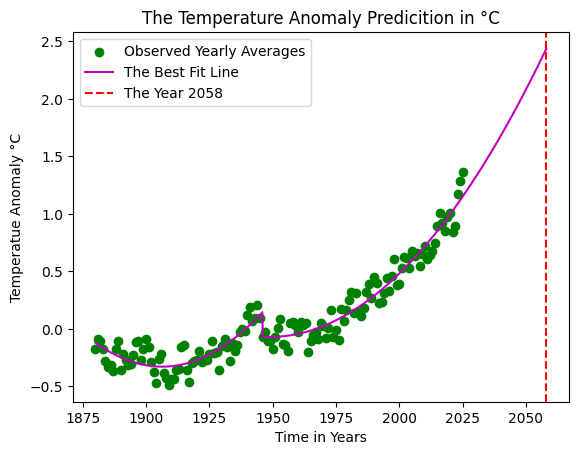

Expected value in 2058: 2.433577361304174
Expected value in 2038: 1.6008290868288668


In [290]:
dataTime = np.linspace(1880, 2058, 1000)
plt.figure()
plt.scatter(Year, yearlyAverage, label = 'Observed Yearly Averages', color = 'g')
dQuadPopt = getParams3c(yearlyAverage)
dQuadPopt[-1] = 371
plt.plot(dataTime, doubleQuad(dataTime, *dQuadPopt), label = 'The Best Fit Line', color = 'm')
plt.axvline(2058, color = 'r', linestyle = '--', label = 'The Year 2058')
plt.legend()
plt.title("The Temperature Anomaly Predicition in °C")
plt.xlabel("Time in Years")
plt.ylabel("Temperatue Anomaly °C")
plt.show()
a1, b1, c1, a2, b2, c2, splitVal = getParams3c(yearlyAverage) #getting the parameters for a double quadratic fit, only using the second fit since that is what predicts the rest of the curve after 1946
print(f"Expected value in 2058: {poly(2058, c2, b2, a2)}")
print(f"Expected value in 2038: {poly(2038, c2, b2, a2)}")


https://www.carbonbrief.org/analysis-when-might-the-world-exceed-1-5c-and-2c-of-global-warming/

This sources says that 2058 is expected to succeed 2 degrees celsius and that the first year to do that is expected to be 2038, this is significantly higher than what my best fit predicts. This source checks several CMIP 6 models and compares them. 